# 泰坦尼克号生存者预测

根据乘客属性，预测什么样的人能够在泰坦尼克号沉没时生存下来

## 数据集说明

* train：训练集，标签列为Suvived
* test：测试集
* gender_submission：测试集标签

## 字段说明

* PassengerId：	乘客编号	1-891
* Survived：	生还情况	0, 1 0 = No, 1 = Yes
* Pclass：	票的等级	1,2,3 1 = 1st, 2 = 2nd, 3 = 3rd
* Name：	乘客姓名	Braund, Mr. Owen Harris
* Sex：	性别	male，female
* Age：	年龄	数字，有缺失值
* SibSp：	兄弟姐妹/配偶在船上	0-8 of siblings / spouses aboard the Titanic	
* Parch：	父母/子女在船上	0-6 of parents / children aboard the Titanic	
* Ticket：	船票编号	A/5 21171
* Fare：	票价	7.25
* Cabin：	船舱号	C85，有缺失值
* Embark：	登船港	S,C,Q Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


## 数据预处理

* 缺失值处理：Age,Cabin
* one-hot编码：Pclass,Embarked

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display

In [2]:
train = pd.read_csv('./data/train.csv')

train_lable = train['Survived'].values.reshape(len(train),1)
train = train[[  'Pclass', 'Sex', 'Age', 'SibSp','Parch',  'Fare', 'Cabin', 'Embarked']]

train['Sex'] = [1 if x == 'male' else 0 for x in train.Sex]
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Cabin'] = pd.factorize(train.Cabin)[0]

train.fillna(0,inplace=True) 
train = pd.get_dummies(train,columns=['Pclass','Embarked'])  # 独热编码
del train['Embarked_0']

In [3]:
test = pd.read_csv('./data/test.csv')

test = test[[ 'Pclass', 'Sex', 'Age', 'SibSp','Parch',  'Fare', 'Cabin', 'Embarked']]

test['Sex'] = [1 if x == 'male' else 0 for x in test.Sex]
test['Age'] = test['Age'].fillna(train['Age'].mean())
test['Cabin'] = pd.factorize(test.Cabin)[0]

test.fillna(0,inplace=True) 
test = pd.get_dummies(test,columns=['Pclass','Embarked'])  # 独热编码

test_lable =  pd.read_csv('./data/gender_submission.csv')
test_lable = test_lable['Survived'].values.reshape(len(test),1)

## 搭建神经网络

In [4]:
import tensorflow as tf

x = tf.placeholder('float',shape=[None,12])
y = tf.placeholder('float',shape=[None,1])

weight = tf.Variable(tf.random_normal([12,1]))
bias  = tf.Variable(tf.random_normal([1]))
ouput = tf.matmul(x,weight)+bias
pred = tf.cast(tf.sigmoid(ouput)>0.5,tf.float32)

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=ouput))

train_step = tf.train.GradientDescentOptimizer(0.0003).minimize(loss)
accuracy = tf.reduce_mean(tf.cast(tf.equal( pred,y),tf.float32))

sess = tf.Session()
writer = tf.summary.FileWriter("logs/", sess.graph)
sess.run(tf.global_variables_initializer())

loss_train = []
train_acc = []
test_acc = []


d:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


0.46485993 0.7912088 0.93779904


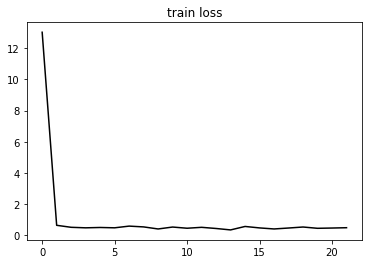

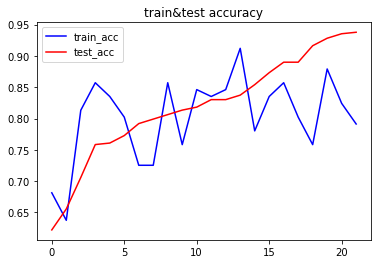

In [ ]:
for i in range(25000):
    index = np.random.permutation(len(train_lable))
    train = train.iloc[index]
    train_lable = train_lable[index]
    for n in range(len(train)//100+1):
        batch_xs = train[n*100:n*100+300]
        batch_ys = train_lable[n*100:n*100+300]
        sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
    if i%1000 == 0:
        loss_temp = sess.run(loss,feed_dict={x:batch_xs,y:batch_ys})
        loss_train.append(loss_temp)
        train_acc_temp = sess.run(accuracy,feed_dict={x:batch_xs,y:batch_ys})
        train_acc.append(train_acc_temp)
        test_acc_temp = sess.run(accuracy,feed_dict={x:test,y:test_lable})
        test_acc.append(test_acc_temp)
        display.clear_output(wait=True)
        print(loss_temp,train_acc_temp,test_acc_temp)
        plt.plot(loss_train,'k-')
        plt.title('train loss')
        plt.show()
        plt.plot(train_acc,'b-',label='train_acc')
        plt.plot(test_acc,'r-',label='test_acc')
        plt.title('train&test accuracy')
        plt.legend()
        plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_train,'k-')
plt.title('train loss')
plt.show()

In [ ]:
plt.plot(train_acc,'b-',label='train_acc')
plt.plot(test_acc,'r-',label='test_acc')
plt.title('train&test accuracy')
plt.legend()
plt.show()